In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
data = pd.read_csv('dataset/data.csv')

In [4]:
data

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616651,616652,Backstage : Les coulisses du succès,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 08:00:00,2019-01-22 08:30:00,2,Backstage : Les coulisses du succès,Tous en choeur,Ongoing Dramatic Series,No,Yes,No,No,0.0,-22.375
616652,616653,Le Studio,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 08:30:00,2019-01-22 09:00:00,2,Le Studio,On tourne et on tourne,Ongoing Dramatic Series,No,Yes,No,No,1.1,-22.375
616653,616654,Jane l'Immaculée (M),VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 09:00:00,2019-01-22 10:00:00,4,Jane l'Immaculée (M),L'effet d'une bombe,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,0.3,-22.525
616654,616655,Jane l'Immaculée (M),VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 10:00:00,2019-01-22 11:00:00,4,Jane l'Immaculée (M),Nouvelle donne,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,0.4,-22.775


In [5]:
x , y =  data[data.columns[:-1]], data["Market Share_total"]

In [6]:
new_start_date = x['Start_time'].str.split(" ", n = 1, expand = True)[1]
new_end_date = x['End_time'].str.split(" ", n = 1, expand = True)[1] 
x["Start Time"]= new_start_date
x["End Time"]= new_end_date
x.drop(columns =['Start_time'], inplace = True) 
x.drop(columns =['End_time'], inplace = True)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
for col in x.columns:
    x[col] = le.fit_transform(list(x[col]))

In [8]:
x

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Start Time,End Time
0,0,6388,21,0,0,0,0,1,8,6388,80342,11,0,1,0,0,9,357,468
1,1,249,21,0,0,0,0,1,2,249,80342,8,0,1,0,0,5,468,497
2,2,2086,21,0,0,0,0,1,2,2086,80342,7,0,1,0,0,3,497,527
3,3,2088,21,0,0,0,0,1,4,2088,80342,14,0,1,0,0,17,527,586
4,4,5870,21,0,0,0,0,1,2,5870,80342,20,0,1,0,0,22,586,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616651,616651,433,22,1,3,3,876,5,2,433,71746,16,0,1,0,0,0,468,497
616652,616652,2602,22,1,3,3,876,5,2,2602,56578,16,0,1,0,0,11,497,527
616653,616653,2158,22,1,3,3,876,5,4,2158,36702,15,0,1,0,0,3,527,586
616654,616654,2158,22,1,3,3,876,5,4,2158,55888,15,0,1,0,0,4,586,643


In [9]:
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [11]:
dtree.fit(x_train ,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
treepredictop = dtree.predict(x_dev)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_dev,treepredictop))

0.9999932135917344


In [14]:
from IPython.display import Image  as image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from PIL import Image

/home/mina/.virtualenvs/tensorflow/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=x_train.columns, filled=True, rounded=True)

In [16]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

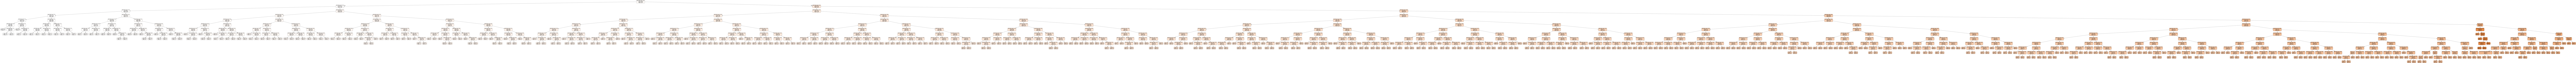

In [17]:
image(graph[0].create_png())

In [18]:
from sklearn.svm import SVR

In [25]:
svm_model = SVR(kernel='rbf')

In [ ]:
svm_model.fit(x_train, y_train)

In [1]:
#NN
x , y =  data[data.columns[:-1]], data["Market Share_total"]
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size=0.3, random_state=42)

NameError: name 'data' is not defined

In [50]:
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(x_train)  # doctest: +SKIP
x_train = scaler.transform(x_train)  # doctest: +SKIP
# apply same transformation to test data
x_dev = scaler.transform(x_dev)  # doctest: +SKIP

In [48]:
from sklearn.neural_network import MLPClassifier

0.073

In [59]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,), random_state=42)
clf

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
clf.fit(x_train ,y_train)

ValueError: Unknown label type: (array([0.04 , 0.073, 0.01 , ..., 0.009, 0.052, 0.337]),)